<a href="https://colab.research.google.com/github/Rosh-pvr/PyTorch_projects/blob/main/Pytorch_crackers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu


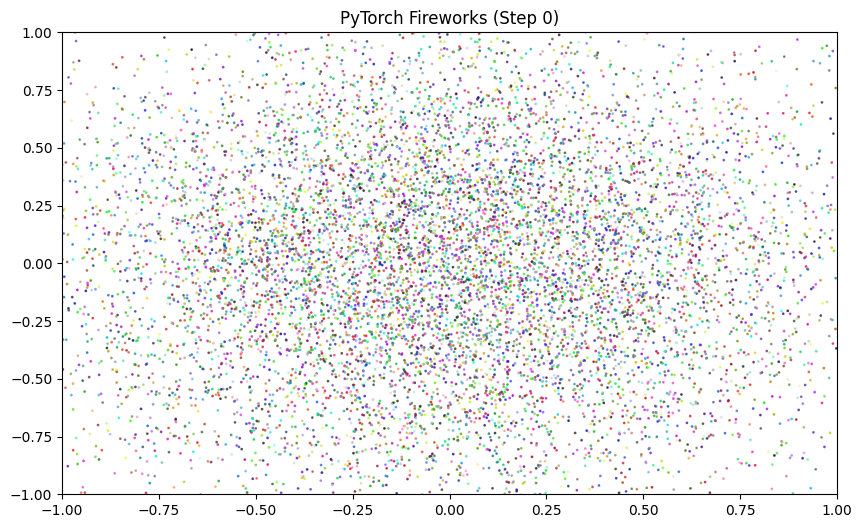

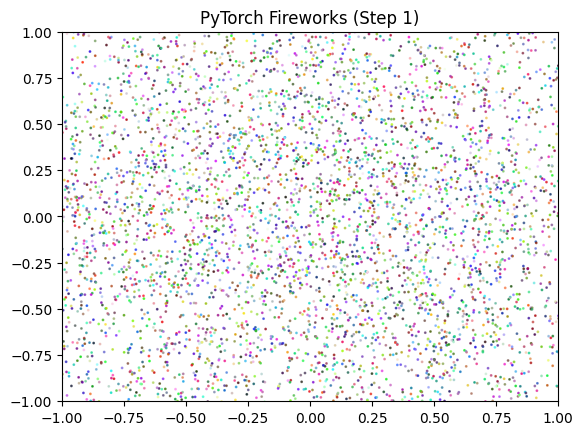

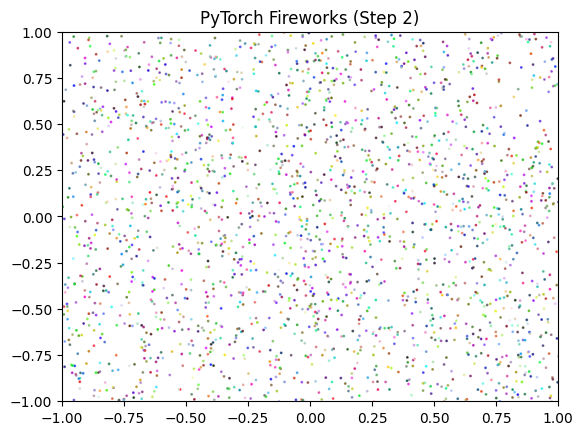

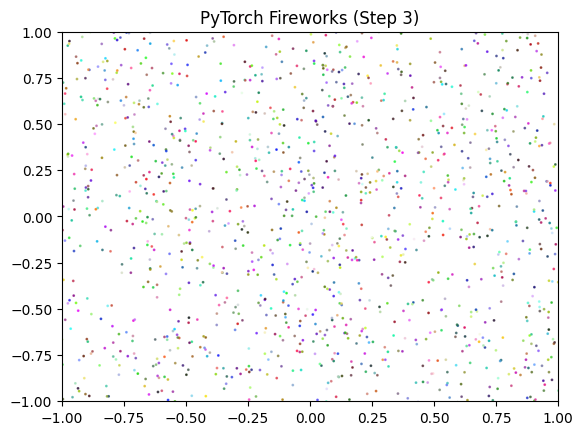

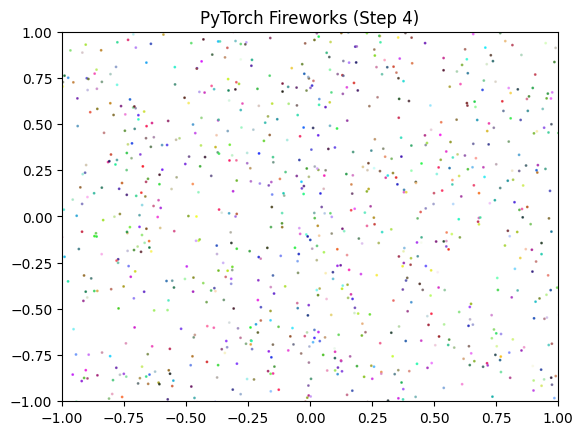

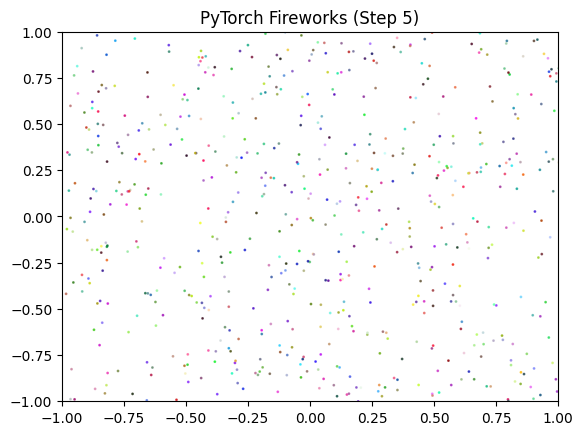

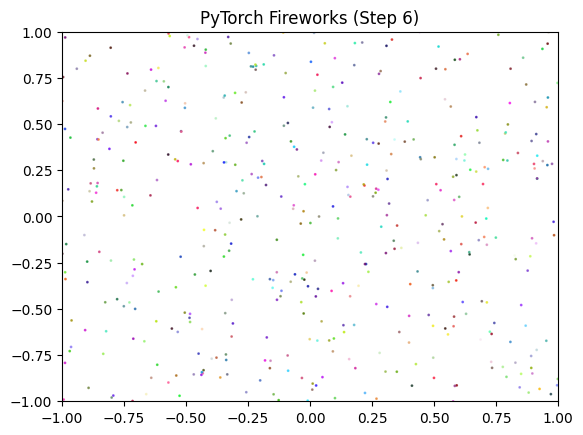

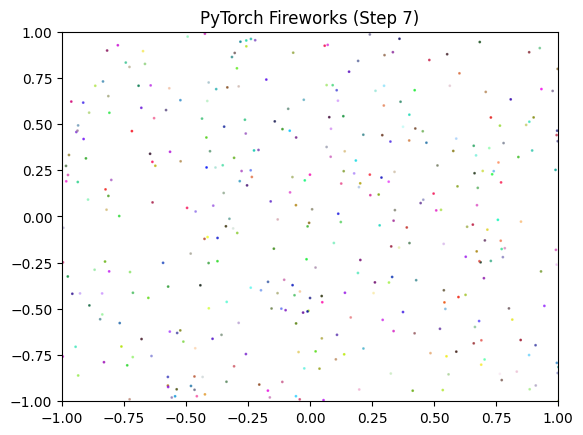

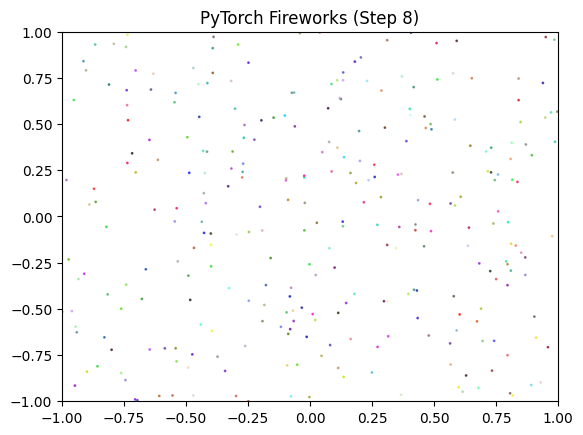

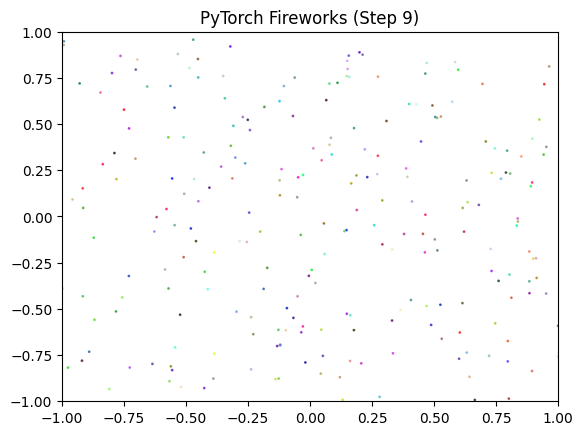

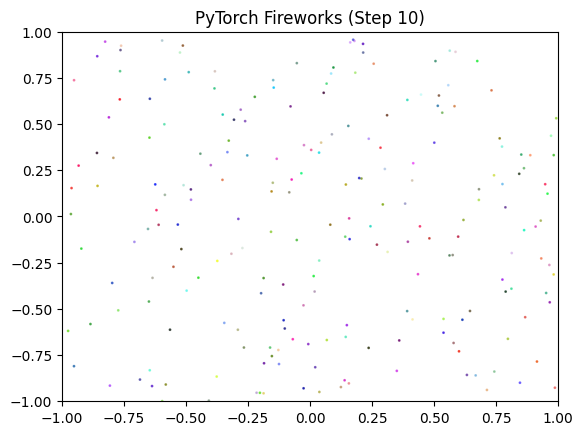

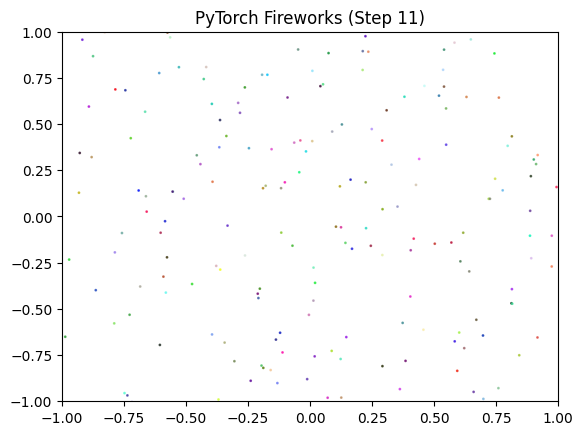

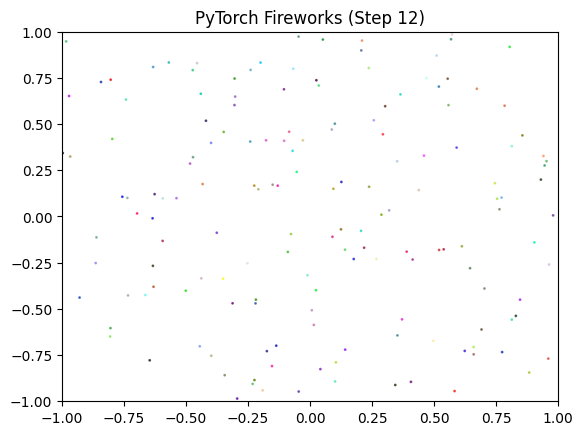

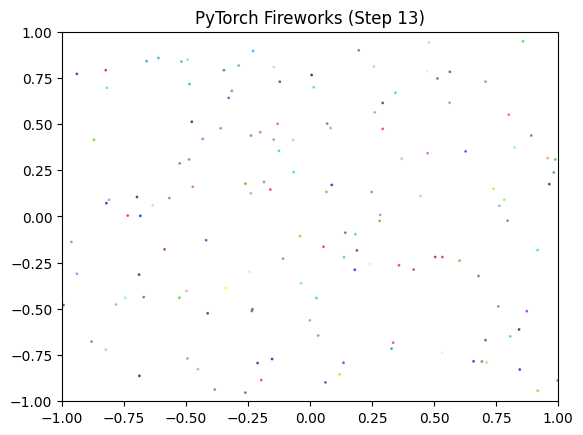

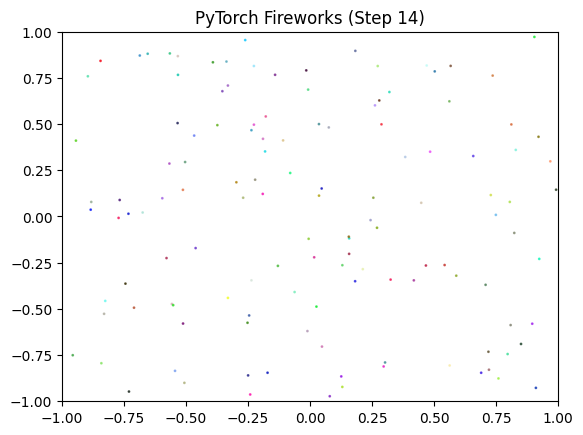

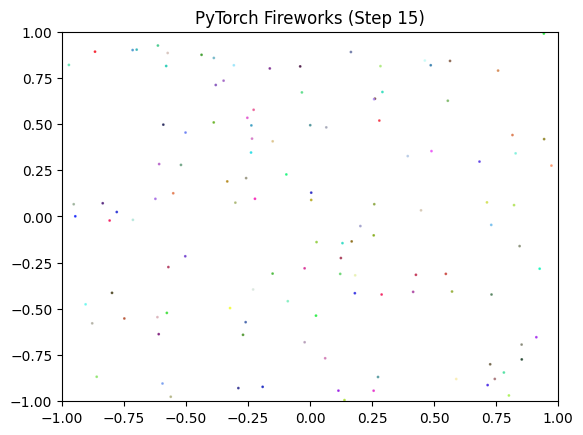

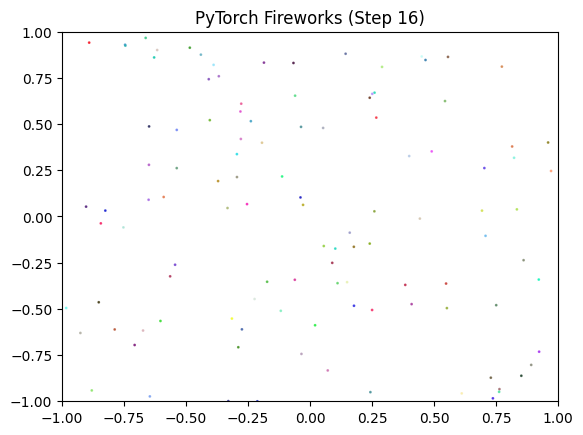

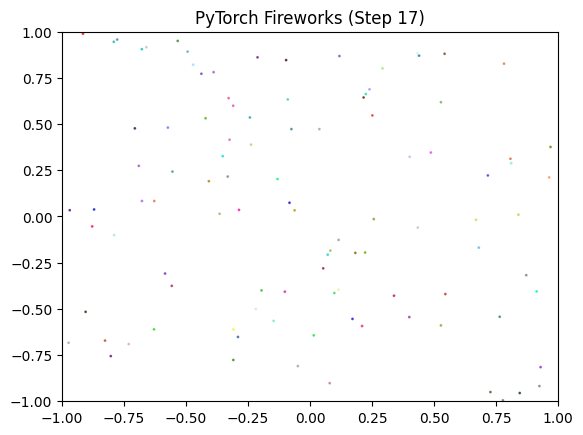

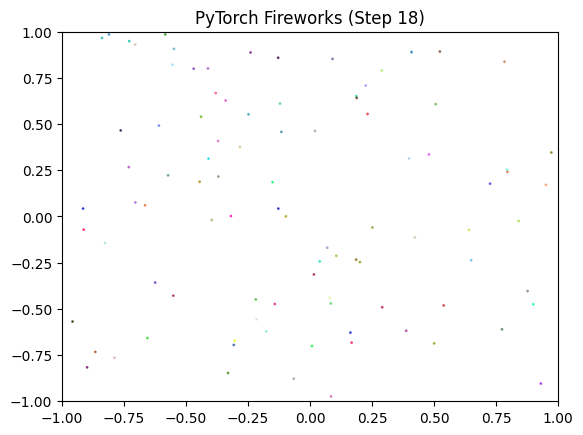

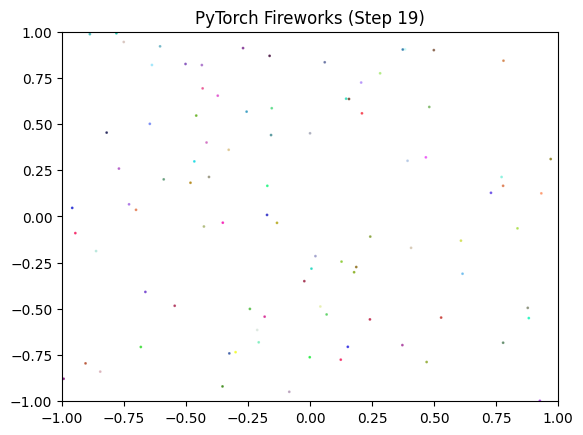

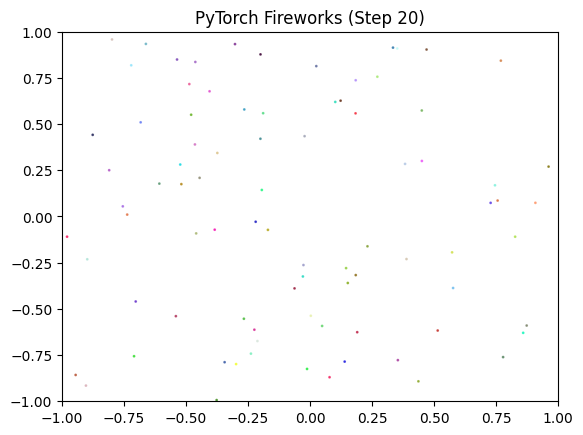

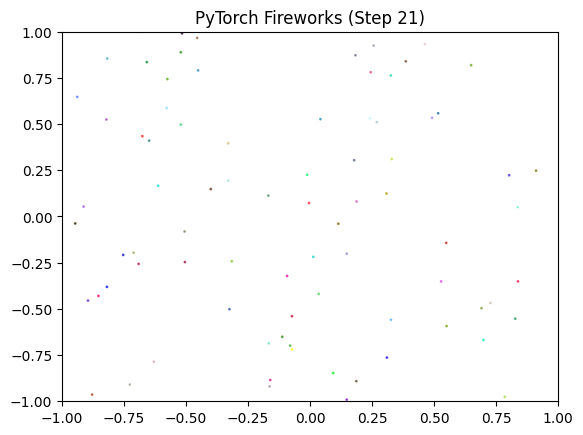

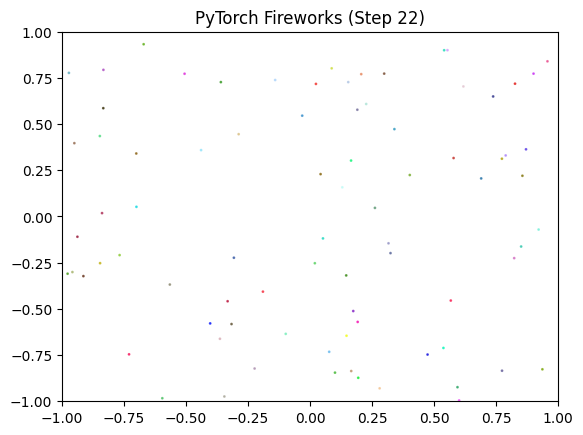

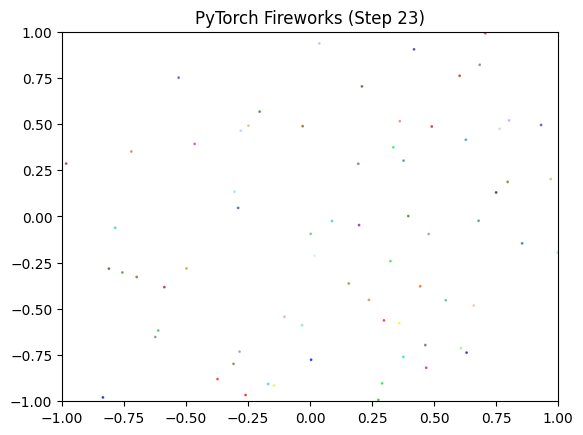

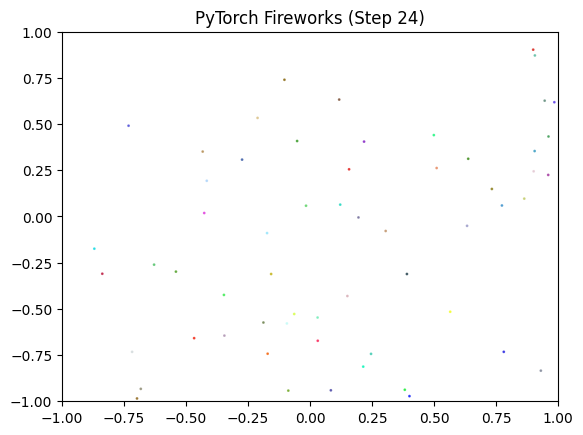

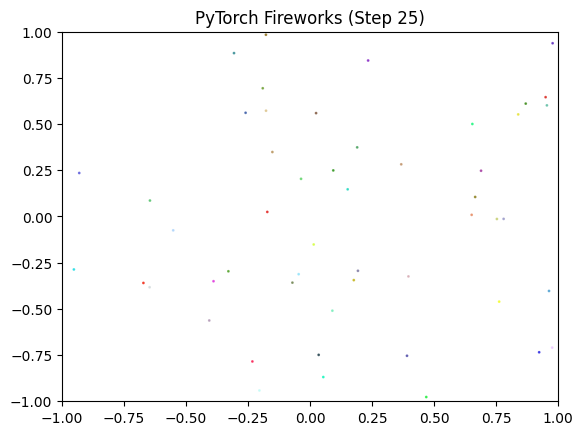

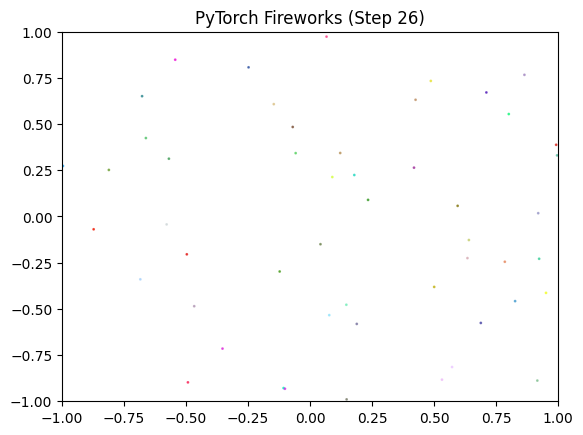

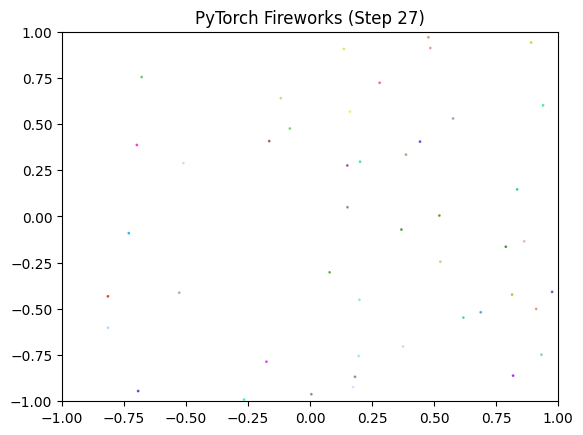

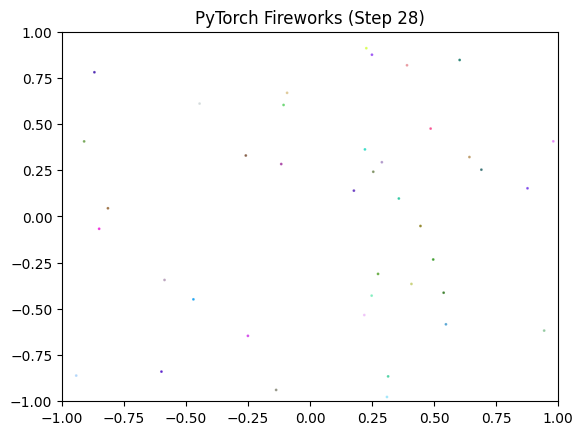

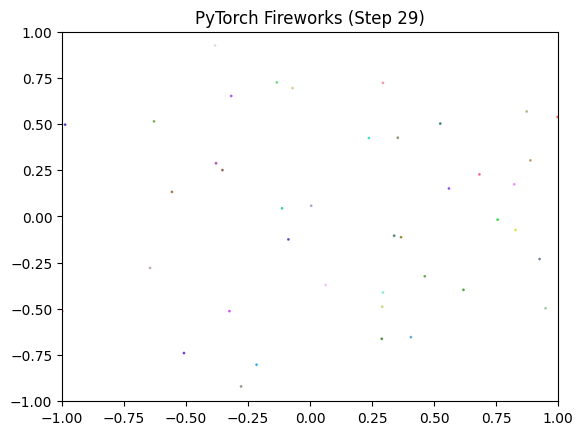

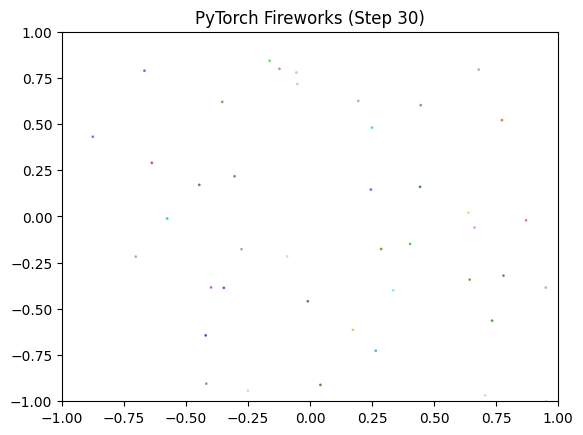

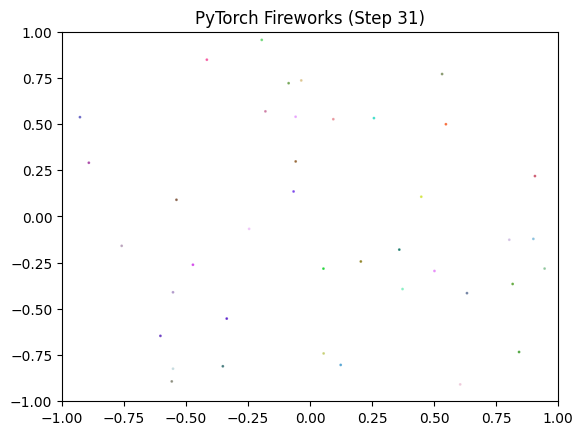

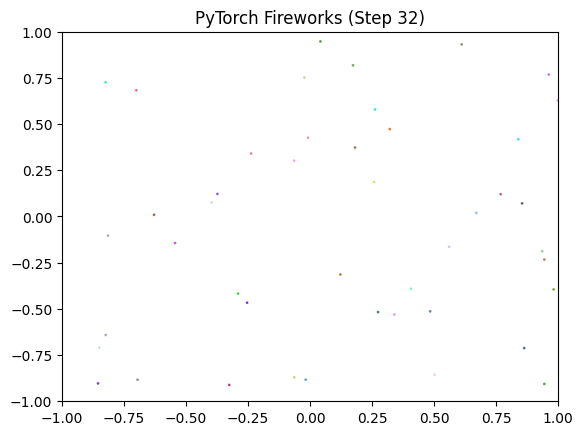

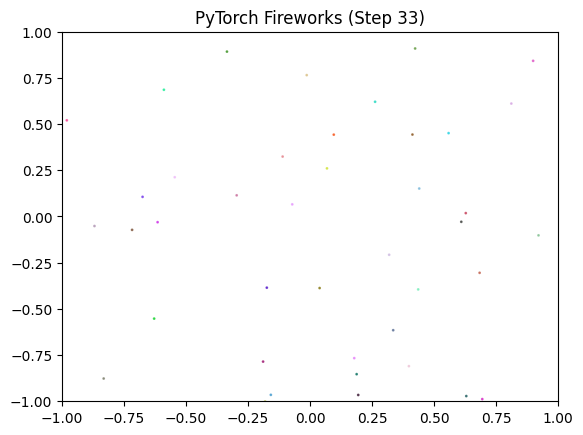

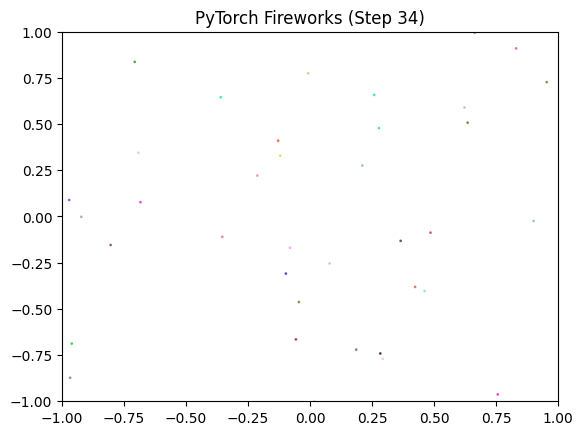

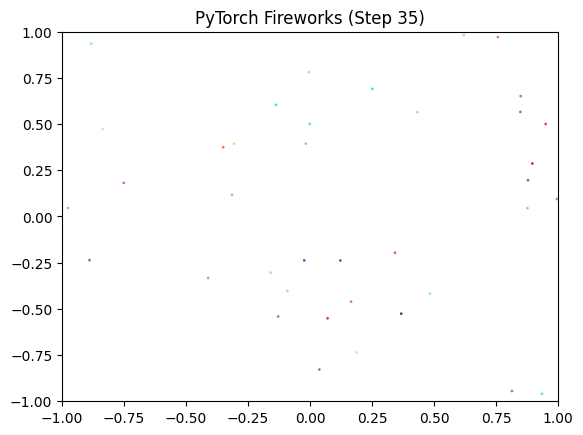

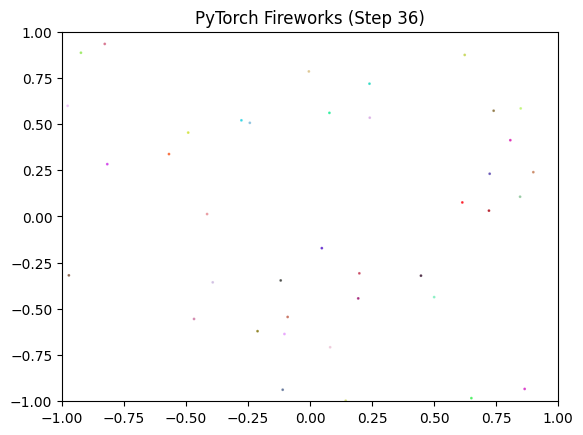

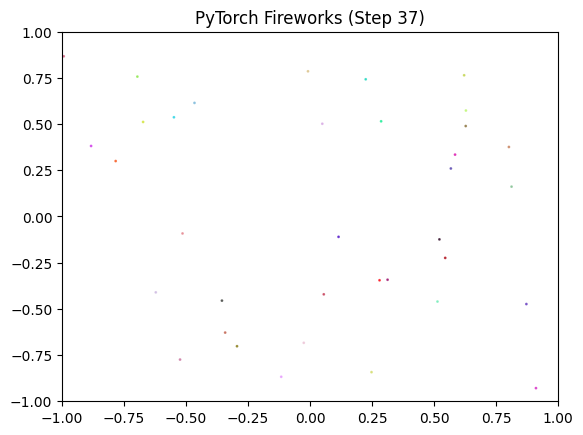

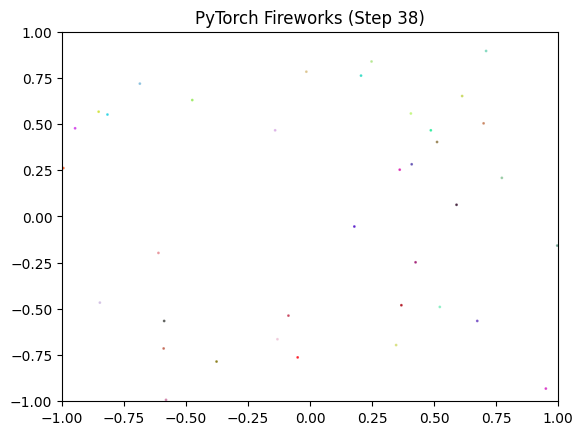

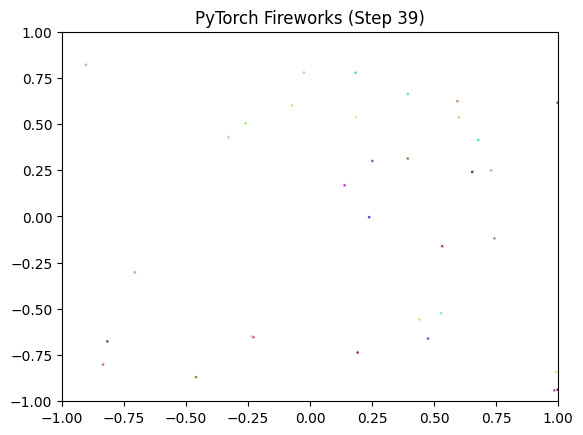

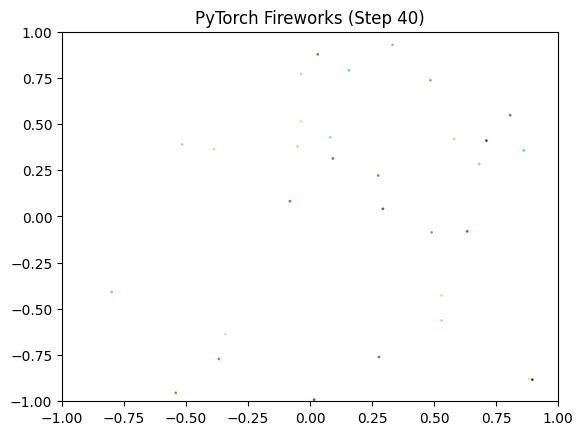

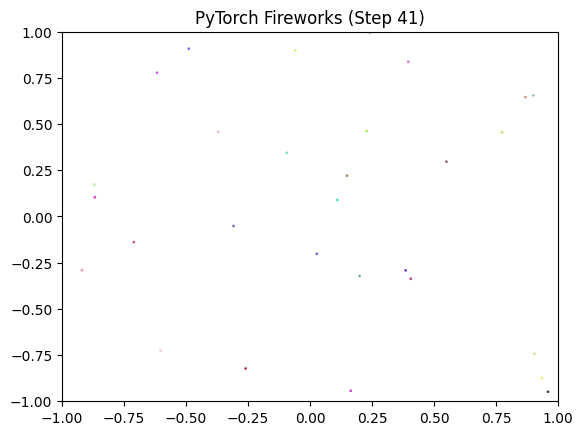

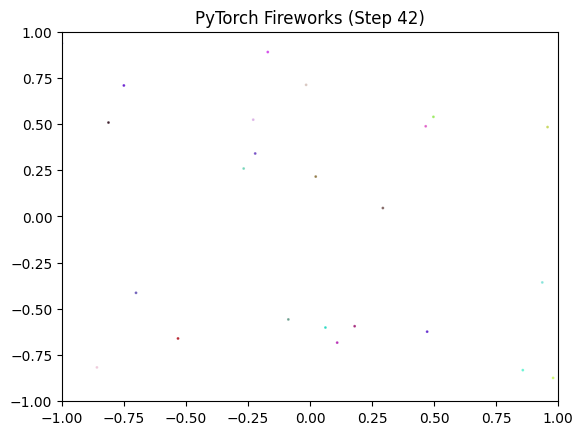

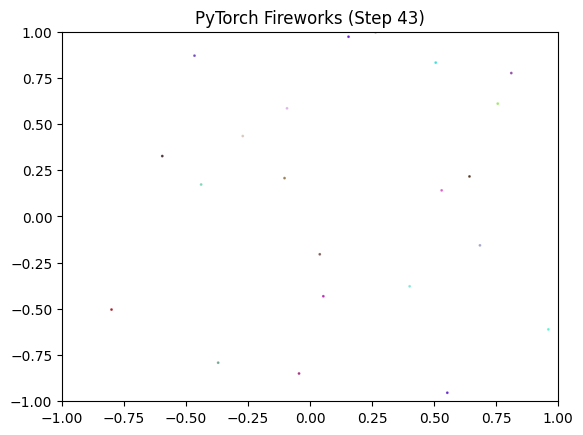

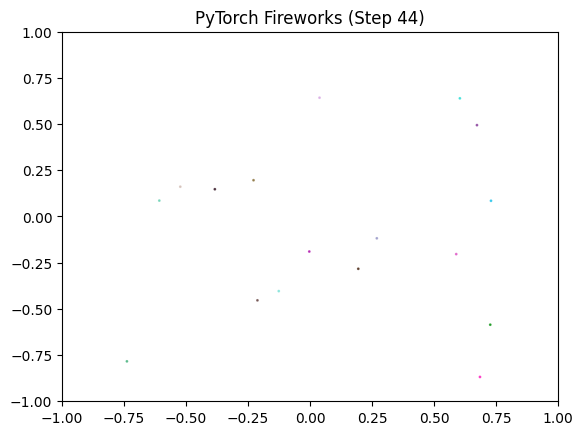

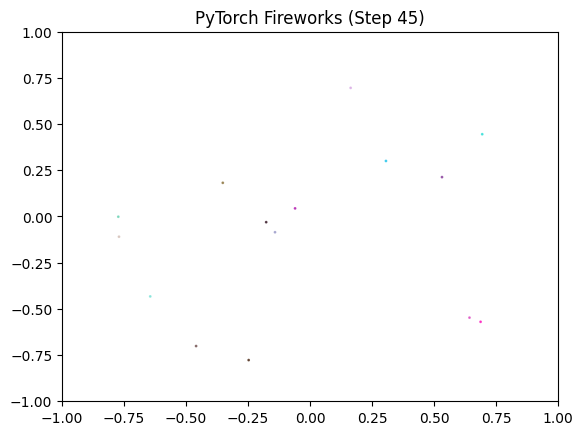

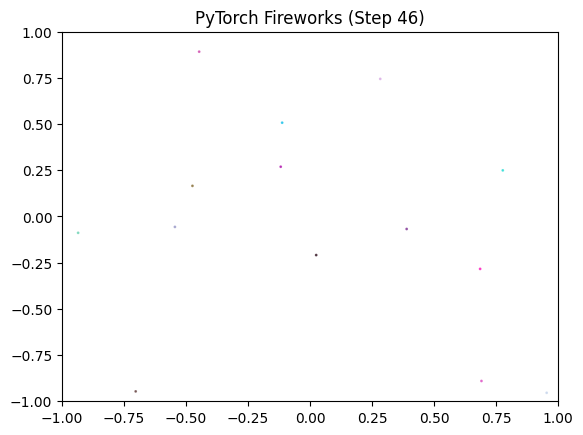

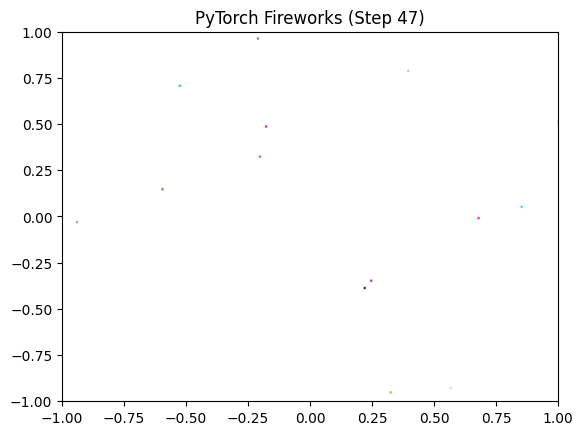

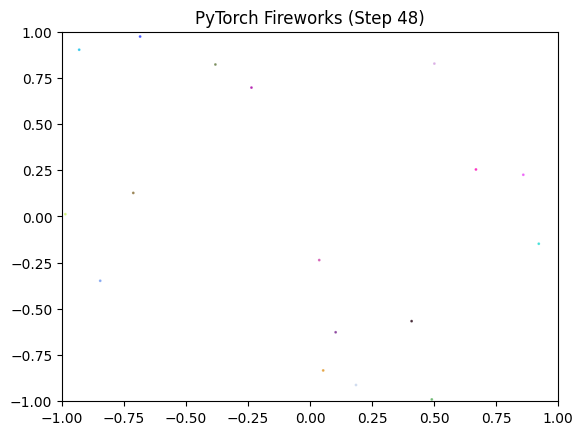

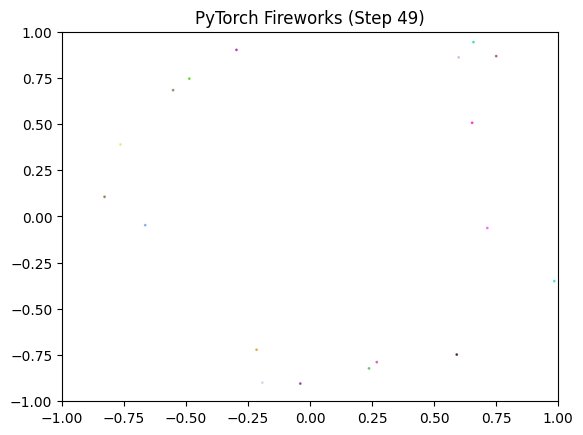

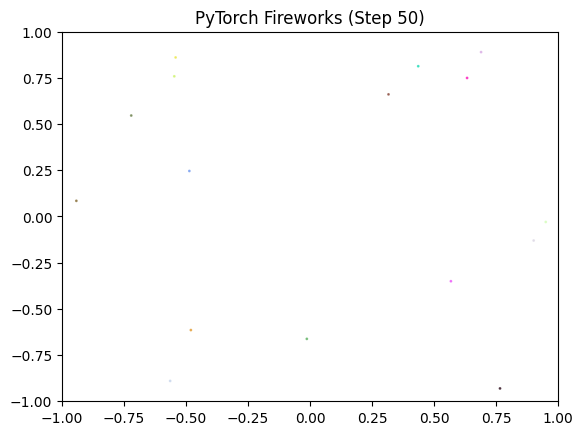

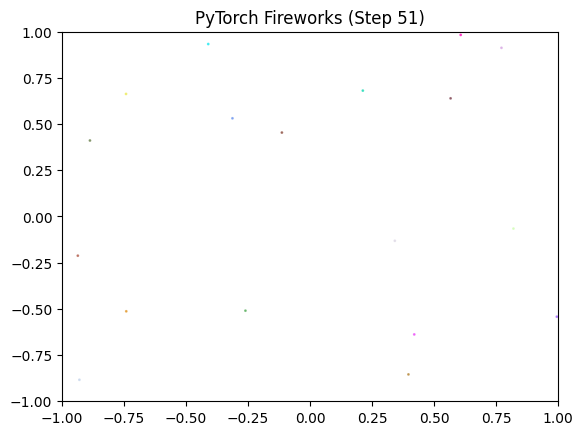

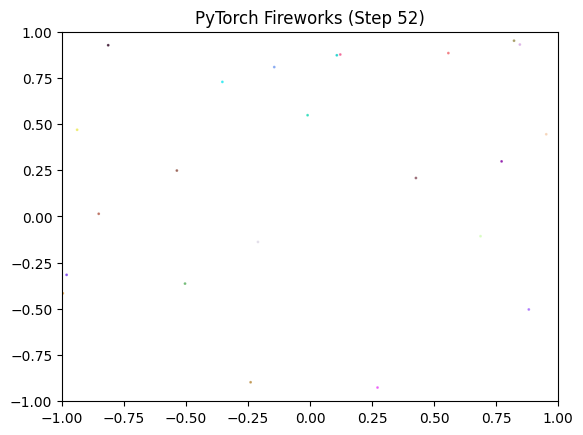

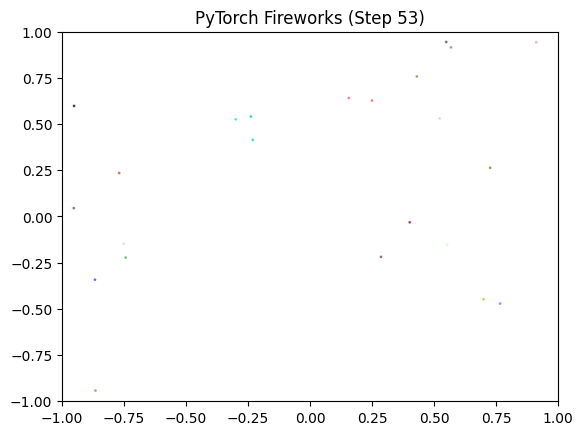

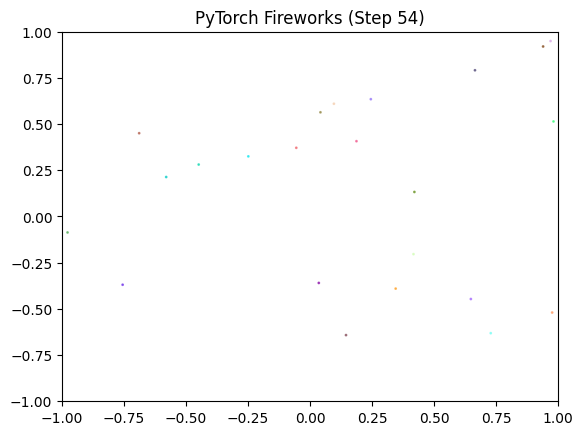

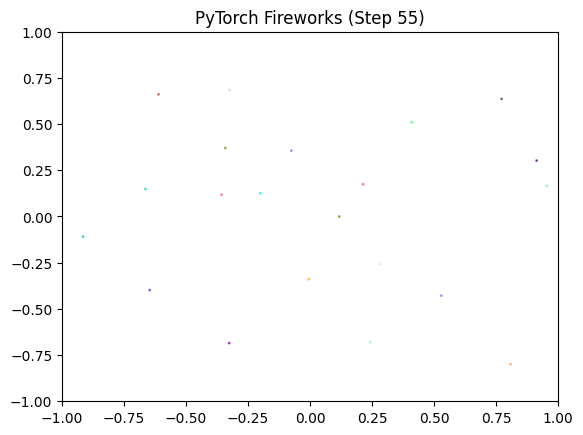

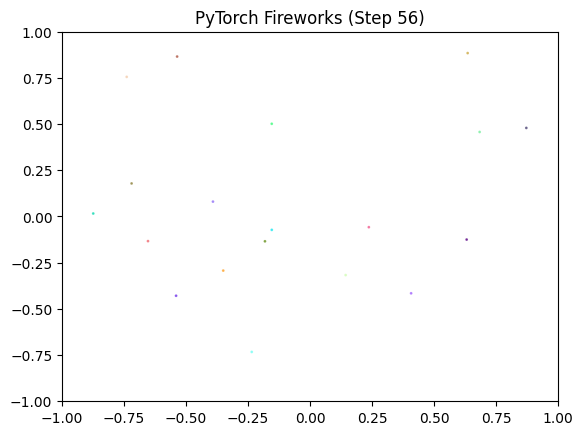

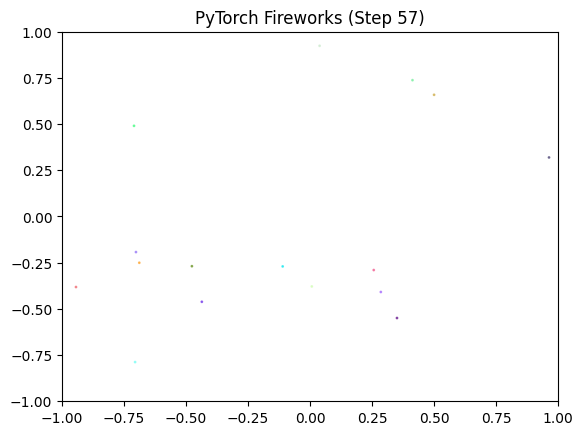

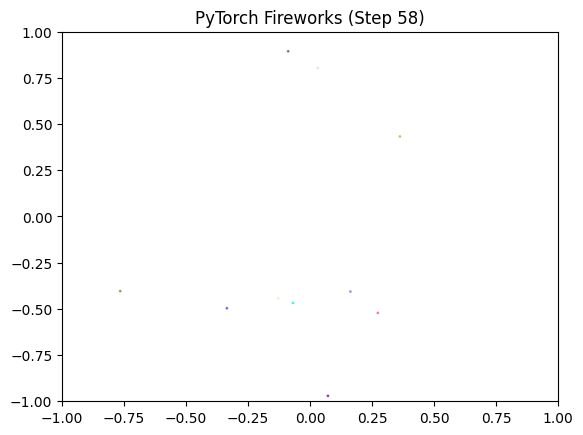

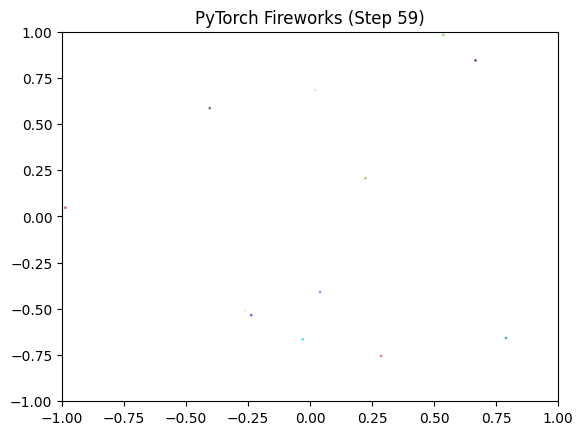

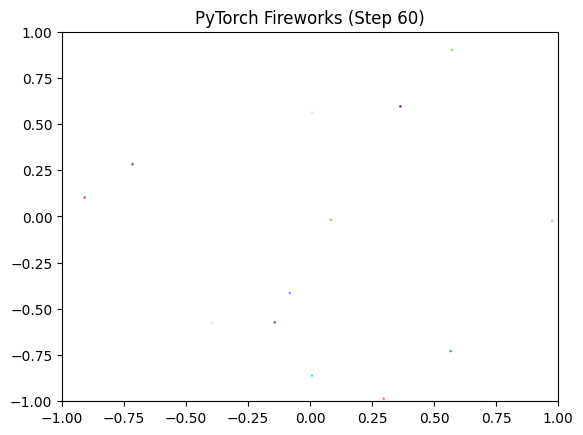

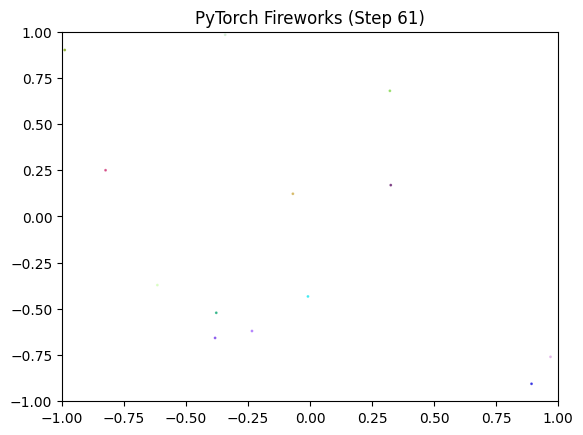

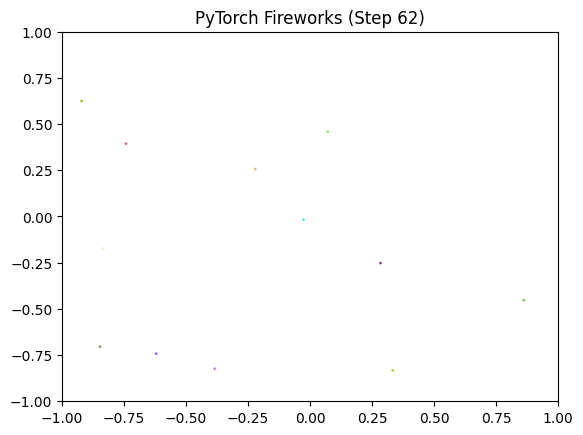

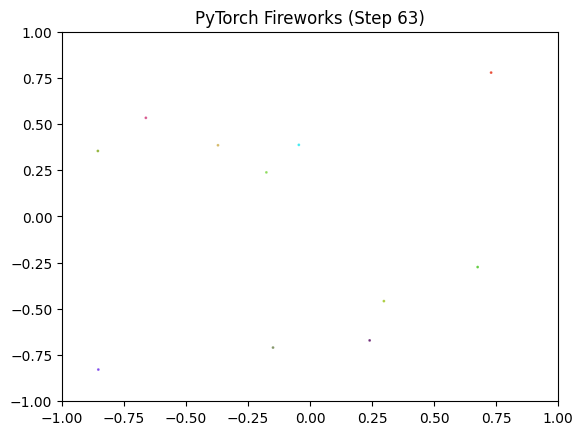

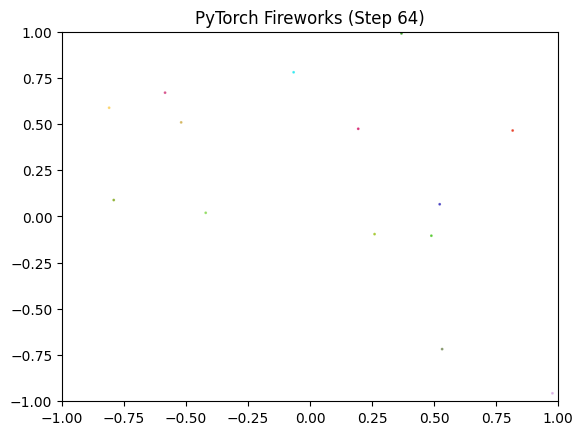

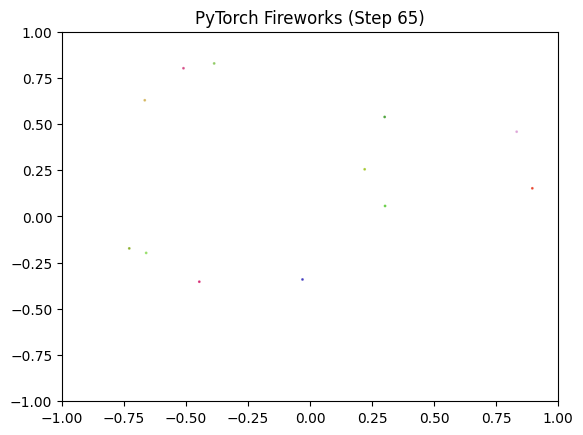

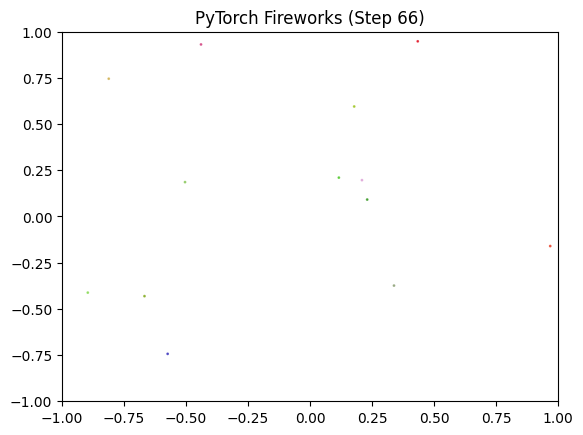

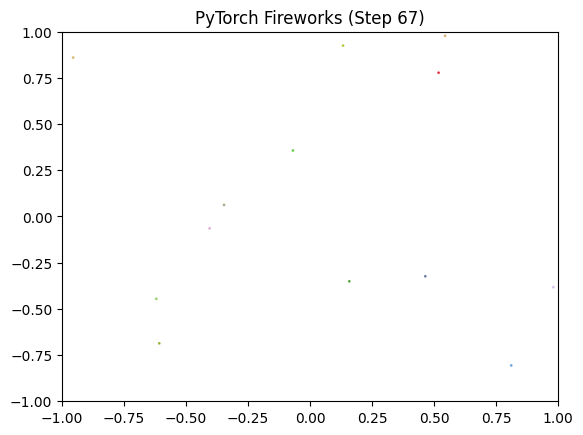

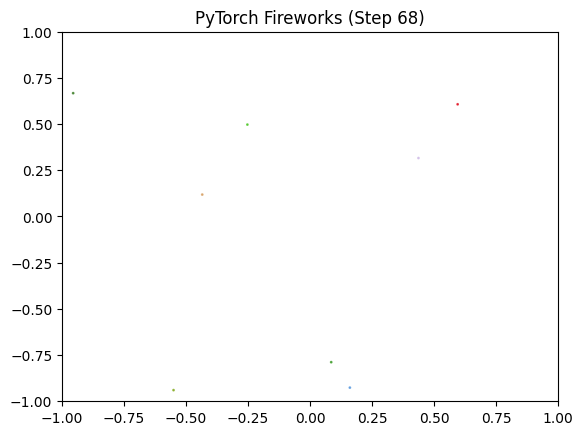

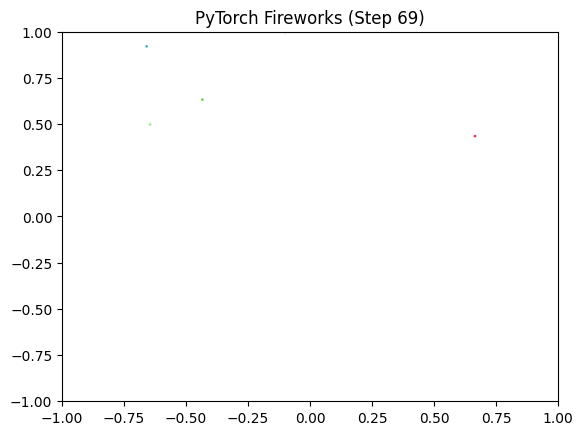

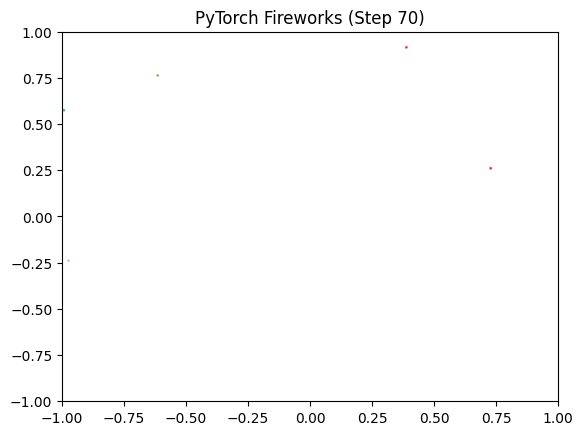

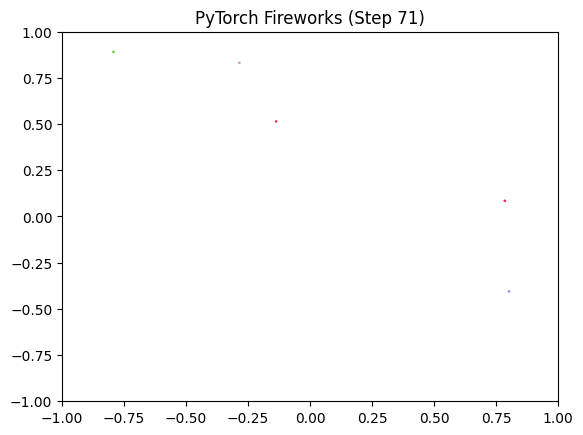

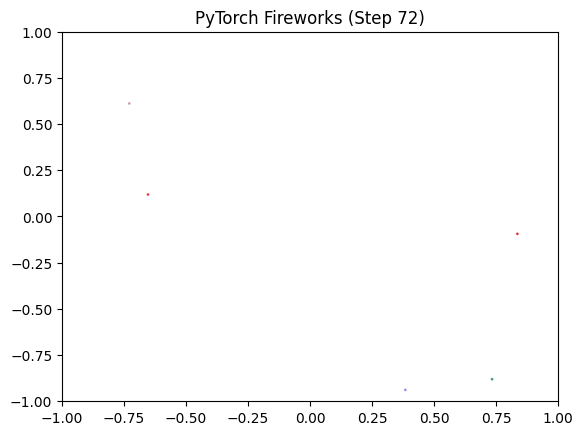

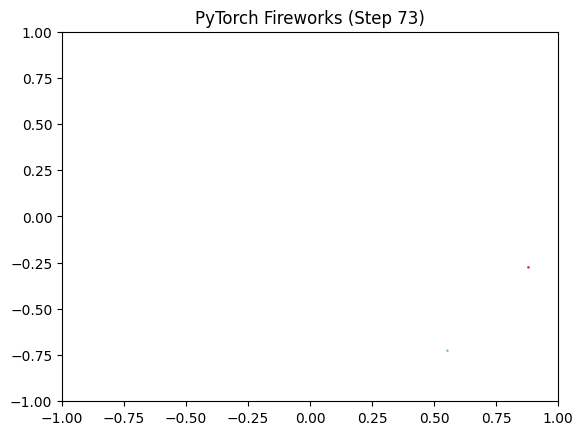

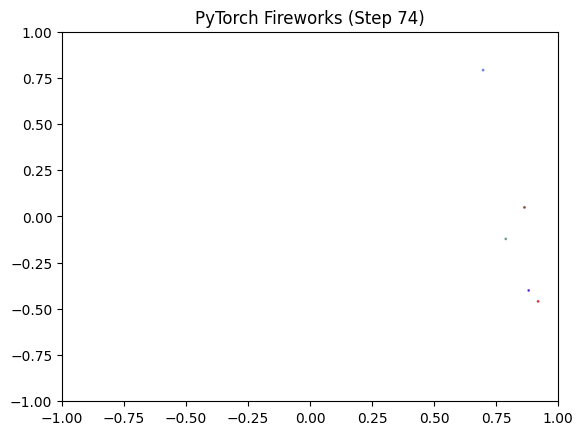

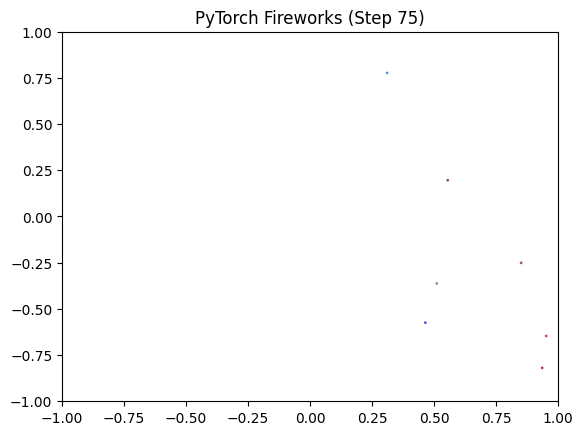

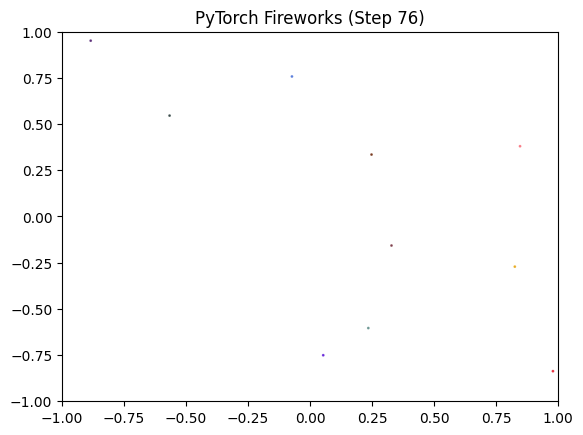

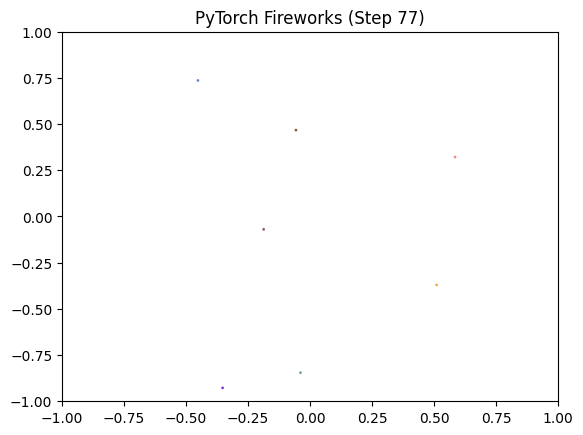

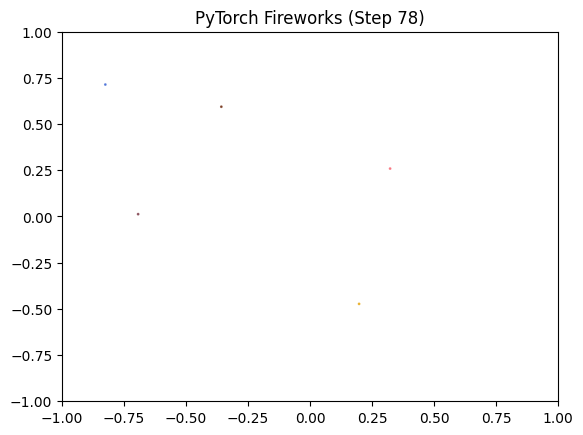

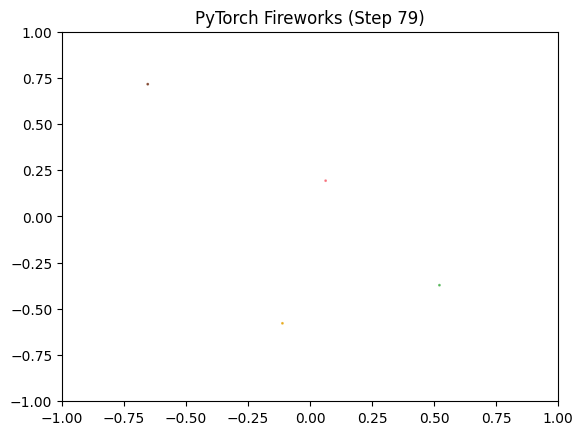

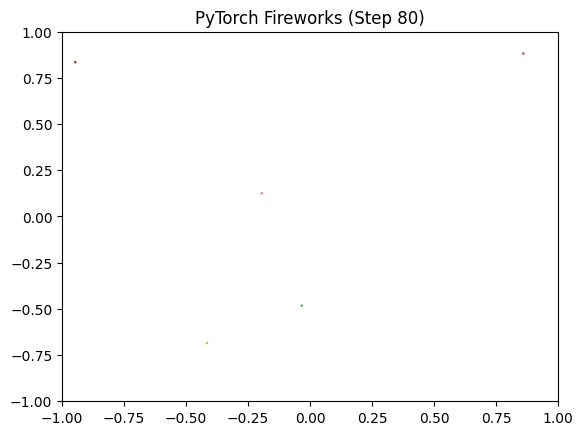

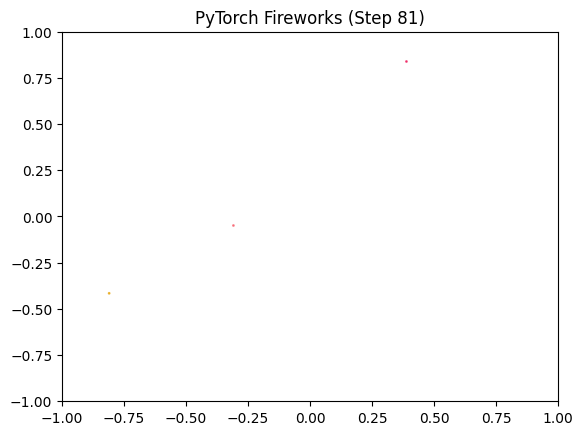

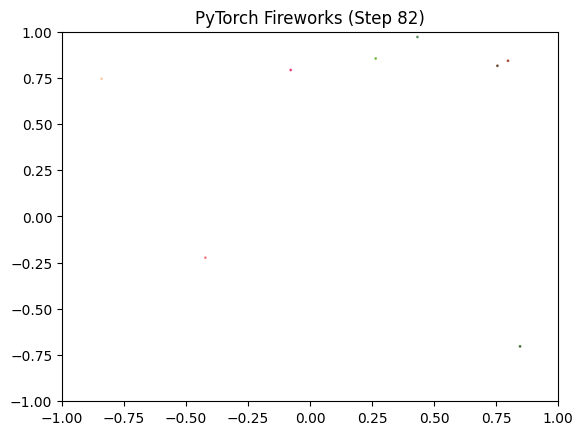

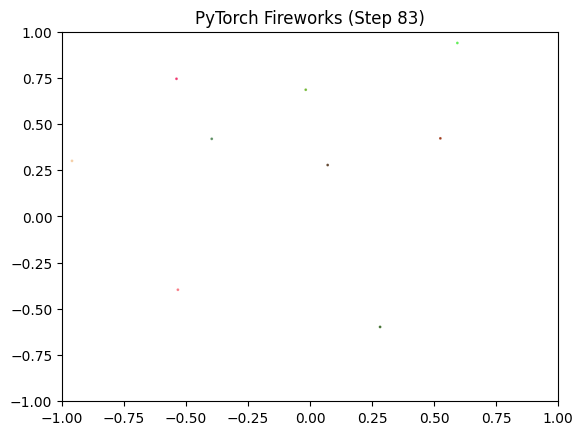

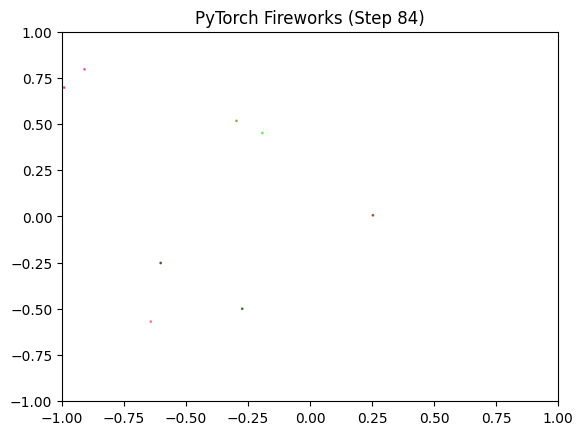

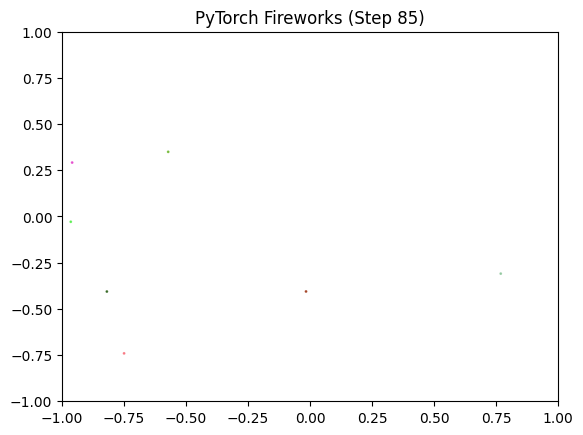

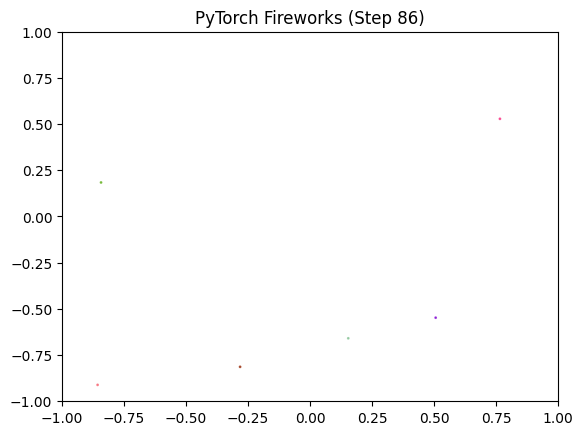

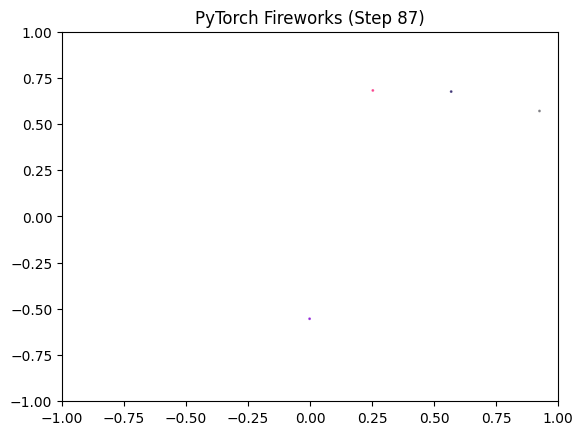

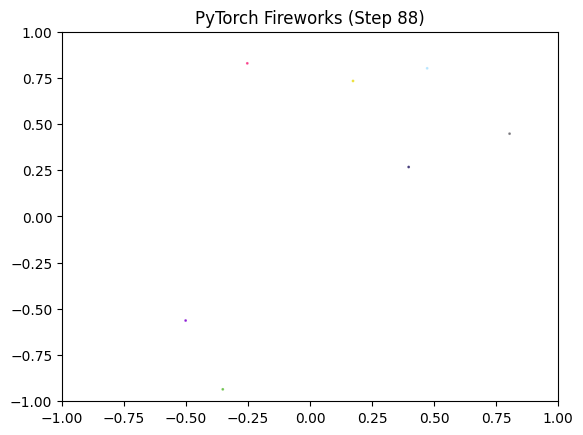

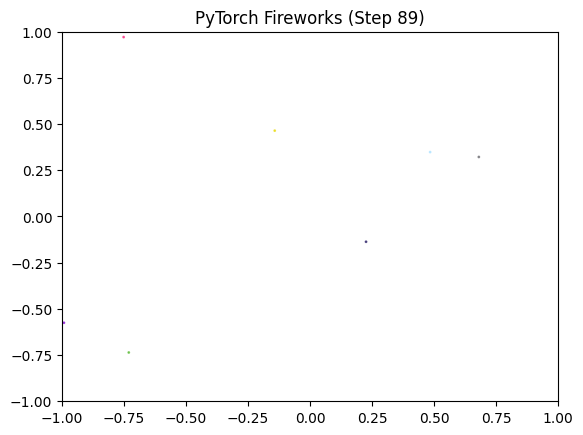

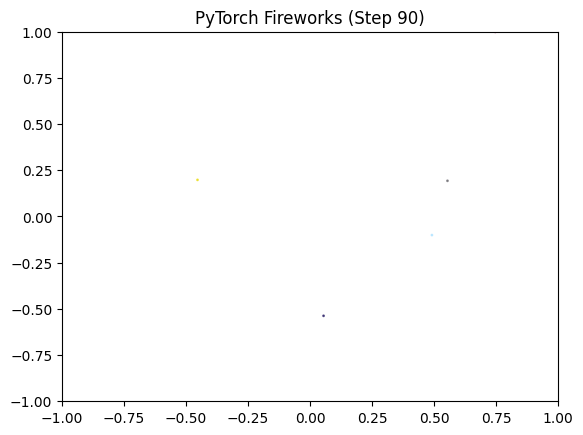

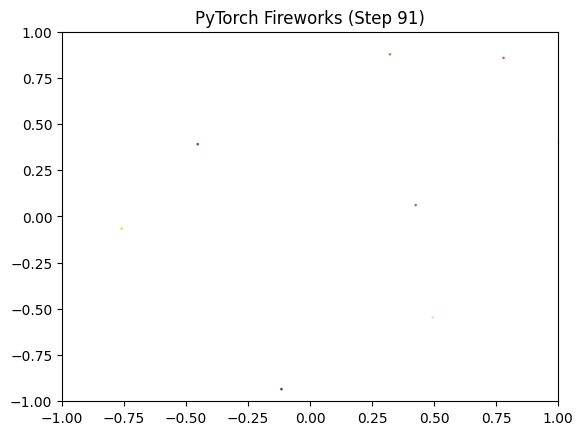

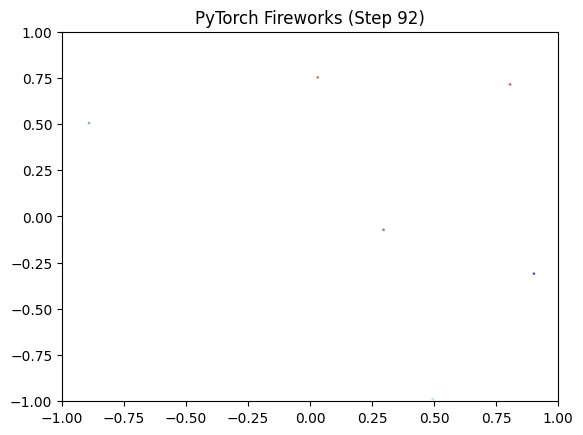

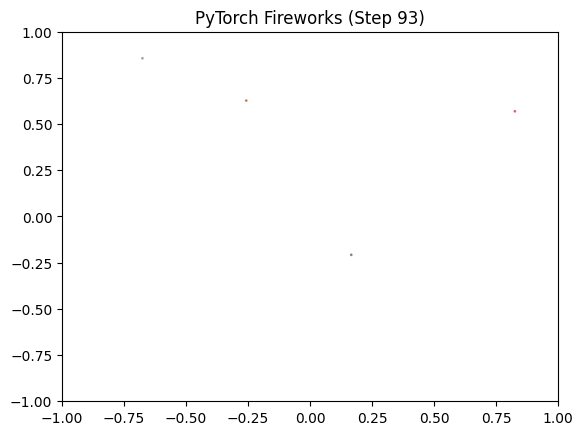

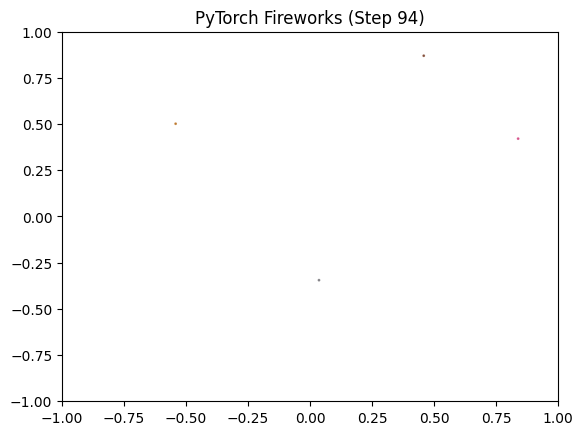

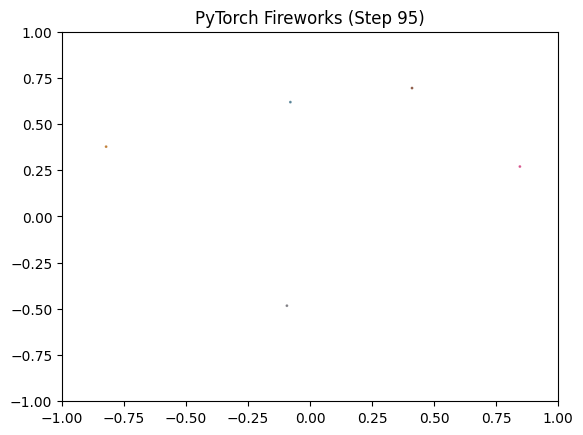

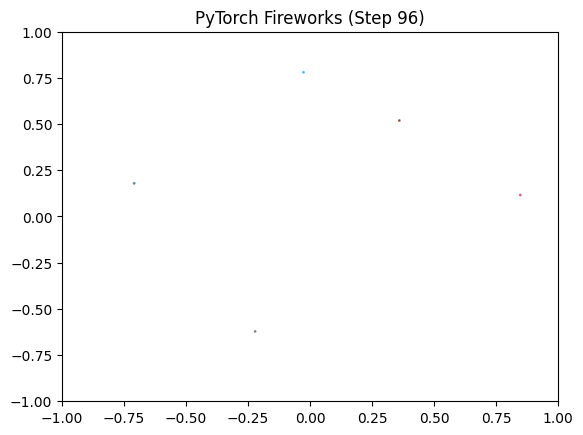

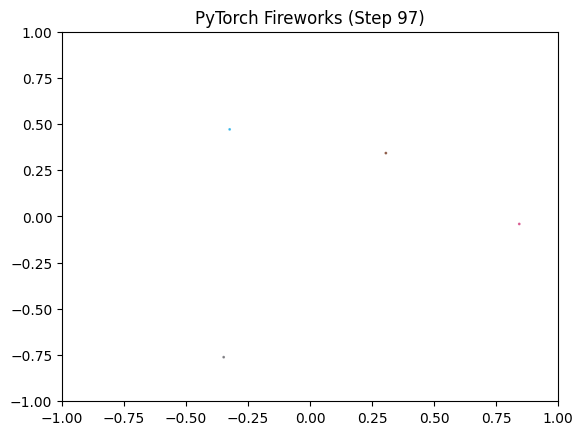

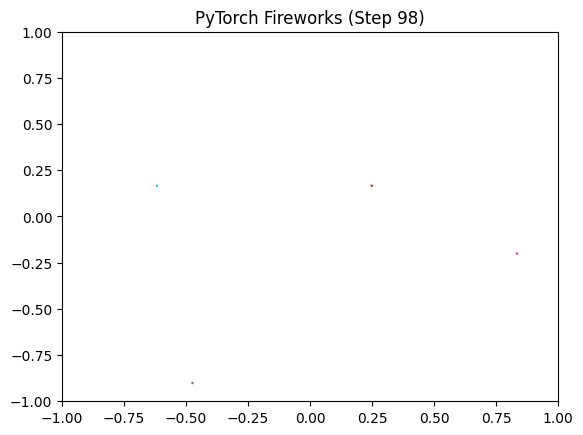

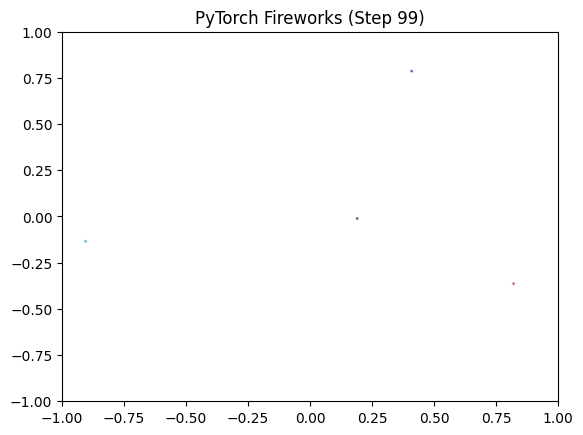

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ====== 1. GPU-Accelerated Firework Particles ======
num_particles = 10_000  # 10K particles (GPU handles this easily!)
positions = torch.randn(num_particles, 2, device=device) * 0.1  # Start clustered
velocities = torch.randn(num_particles, 2, device=device) * 0.5  # Random initial speed
colors = torch.rand(num_particles, 3, device=device)  # RGB colors

# ====== 2. Tiny Neural Net to Control Particle Motion ======
class FireworkNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 32),  # Input: (x, y) position
            nn.ReLU(),
            nn.Linear(32, 2)    # Output: (velocity_x, velocity_y)
        )

    def forward(self, x):
        return self.fc(x)

model = FireworkNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ====== 3. Simulate Fireworks! ======
plt.figure(figsize=(10, 6))
for step in range(100):  # 100 animation steps
    # Neural net adjusts velocities
    velocities += model(positions).tanh() * 0.01

    # Update positions (GPU parallelized!)
    positions += velocities
    velocities *= 0.98  # Friction

    # Random bursts (like fireworks exploding)
    if step % 20 == 0:
        velocities += torch.randn_like(velocities) * 0.3

    # Plot (move data to CPU for matplotlib)
    plt.clf()
    plt.scatter(
        positions[:, 0].detach().cpu().numpy(),  # <-- FIXED: Added .detach()
        positions[:, 1].detach().cpu().numpy(),  # <-- FIXED: Added .detach()
        c=colors.cpu().numpy(),  # Colors don't need grad, so no detach needed
        s=1, alpha=0.7
    )
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title(f"PyTorch Fireworks (Step {step})")
    plt.pause(0.01)

plt.show()